<a href="https://colab.research.google.com/github/ashupednekar/StyleEncrypt/blob/master/Style_Encryption.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%tensorflow_version 2.x
import tensorflow as tf
from PIL import Image, ImageDraw, ImageFont
from random import randint as ri
from matplotlib import pyplot as plt

In [2]:
#downloading fonts
!mkdir fonts
%cd fonts
!wget https://noto-website-2.storage.googleapis.com/pkgs/Noto-unhinted.zip
!unzip Noto-unhinted.zip
%cd ..

/content/fonts
--2020-09-20 10:14:21--  https://noto-website-2.storage.googleapis.com/pkgs/Noto-unhinted.zip
Resolving noto-website-2.storage.googleapis.com (noto-website-2.storage.googleapis.com)... 64.233.189.128, 2404:6800:4008:c07::80
Connecting to noto-website-2.storage.googleapis.com (noto-website-2.storage.googleapis.com)|64.233.189.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1114561068 (1.0G) [application/zip]
Saving to: ‘Noto-unhinted.zip’

Noto-unhinted.zip   100%[===================>]   1.04G   117MB/s    in 9.8s    

2020-09-20 10:14:32 (108 MB/s) - ‘Noto-unhinted.zip’ saved [1114561068/1114561068]

Archive:  Noto-unhinted.zip
  inflating: LICENSE_OFL.txt         
  inflating: NotoColorEmoji.ttf      
  inflating: NotoEmoji-Regular.ttf   
  inflating: NotoKufiArabic-Bold.ttf  
  inflating: NotoKufiArabic-Regular.ttf  
  inflating: NotoMono-Regular.ttf    
  inflating: NotoNaskhArabic-Bold.ttf  
  inflating: NotoNaskhArabic-Regular.ttf  
  i

In [7]:
import os
from random import choice

color_mode = 'white' # or random

def create_image_for_text(text, font):
    """Creating content image for a given input"""
    if color_mode == 'random':
        #Creating background with random color
        img = Image.new('RGB', (2048, 512), color = (ri(0,255), ri(0,255), ri(0,255)))
    else:
        #Creating background with random color
        img = Image.new('RGB', (2048, 512), color = (255, 255, 255))
    plt.figure()
    plt.imshow(img)
    fnt = ImageFont.truetype(font, 400)
    d = ImageDraw.Draw(img)
    d.text((0,0), text, font=fnt, fill=(ri(0,255), ri(0,255), ri(0,255)))
    plt.imshow(img)
    img.save('_'.join(text.split(' ')) + '.jpg')
    return '_'.join(text.split(' ')) + '.jpg'

In [4]:
!pip install pycryptodome

     |████████████████████████████████| 13.7MB 310kB/s 


In [9]:
"""AES"""
from Crypto.Cipher import AES
from Crypto import Random

key = Random.new().read(AES.block_size)
iv = Random.new().read(AES.block_size)

class ImageEncryptor:

    def encrypt(self, path):
        input_file = open(path, 'rb')
        self.path = path
        input_data = input_file.read()
        input_file.close()
        cfb_cipher = AES.new(key, AES.MODE_CFB, iv)
        enc_data = cfb_cipher.encrypt(input_data)
        return enc_data

    def decrypt(self, enc):
        cfb_decipher = AES.new(key, AES.MODE_CFB, iv)
        plain_data = cfb_decipher.decrypt(enc)
        output_file = open(self.path, "wb")
        output_file.write(plain_data)
        output_file.close()

/content/fonts/NotoSansDisplay-SemiCondensed.ttf
b'\xd2\x89T\x92k\xdd\xbdJ\x85\xa4m\xea\xc5E\xd3\xa6\xdb&\xc0\xb9T\x9db^\x16\xa1zi\xdd\xf5\xe7\x13f\xfbX\xa0\x90+\xf8Ff\xae\x9eH[\xdd\xc8\x01\x13\xfd;\xa6\x90\xd2\x97\xd4\xa4\xcc\xd5\xe0q\x11\x1a\xb4\xebk>\x16\r\x12\x18\x0c\xdf\xb1l\xce|\xe4\x11\xe4\x12B2\x8c\xd4a\xef\x86\x7fe]\x10{\xb8\x8a\x0c\x92j\xf3\xd1\n\xc3\xe1\t\xae\x1c\xef\xdc\t\xaa!\x93X6p\xf5\xbcE7\x9b~\x84\xdf\x15\x16r\xe3\xa9\xdeCO^!6\xe9XM\xa7%\x1a\x86s\xd8+*\xab\x96\x9c\x92\x93\x8d\xd6\x9d\x06\xca6S\xee\x04\x11w\x8dy\x137S\x90O\x7f]\x9d\xd4\r\xd5\xfd\xb2i)\x15\xcd\x0fJ\xf8\x04\xf4q[r\xf8"\x7f\x06\x9d\xe7\x04\xa2\xd7\\ \xcf\x86\xb1\xae@b\xddM}\x18\xd0\xc1z\xa1\x0b\xc6\x15\xfd\x03\xe9\xaf\xdc\x9c\x0c;\xf4\x8bIP\x15\xeb\xa0\xe9[\xaa9\xe4\x1bzB\n[\xc0m1iR\x8e\x87\x17\xe1\xaa\x1f\xf8\x96F\xc1Q\xd0\xda\x83\xfd^\xb8\xfb \xa1U>M\xe6_\xfe\xa1\xa9\x96\xb3\xc5y\x070\xdf\x8c8\x94\xa5\x15\xf1\xac\\C\xad\xec\x01 "\x08\xe0G\x89\xe8RZ\xf2E\x02b1~%^}\xf1\x91^>]\xce&\xf6\x9c\xa1r\x1e\\.\x0b)\

0

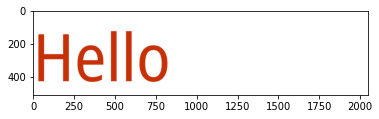

In [14]:
fontface = '/content/fonts/' + choice(os.listdir('/content/fonts/'))
print(fontface)
test_img_path = create_image_for_text('Hello', fontface)

img_encryptor = ImageEncryptor()
enc = img_encryptor.encrypt(test_img_path)
img_encryptor.decrypt(enc)
plt.imshow(Image.open(test_img_path))

img_encryptor = ImageEncryptor()
enc = img_encryptor.encrypt(test_img_path)
print(enc)
os.system('rm '+test_img_path)

In [15]:
# Packages
import tensorflow as tf
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt
import numpy as np
np.random.seed(7)

%matplotlib inline

print(tf.__version__)

2.3.0


In [16]:
!wget https://res.cloudinary.com/dchysltjf/image/upload/f_auto,q_auto:best/v1561023017/output_11_1.png

--2020-09-20 10:34:23--  https://res.cloudinary.com/dchysltjf/image/upload/f_auto,q_auto:best/v1561023017/output_11_1.png
Resolving res.cloudinary.com (res.cloudinary.com)... 23.193.24.49, 2600:1417:76:493::523, 2600:1417:76:495::523
Connecting to res.cloudinary.com (res.cloudinary.com)|23.193.24.49|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 994477 (971K) [image/png]
Saving to: ‘output_11_1.png’

output_11_1.png     100%[===================>] 971.17K  5.32MB/s    in 0.2s    

2020-09-20 10:34:24 (5.32 MB/s) - ‘output_11_1.png’ saved [994477/994477]



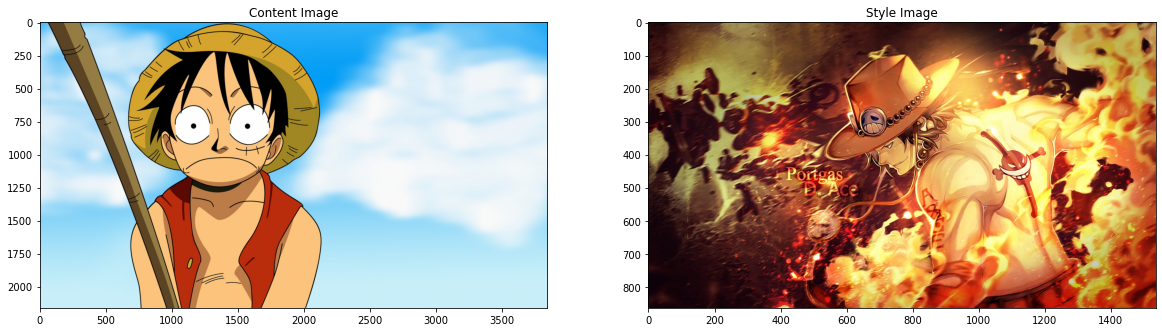

In [29]:
# Load the content and style images
content = plt.imread('Content.jpg')
style = plt.imread('Style.jpg')

# Display the images
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))

# Content and style images side-by-side
ax1.imshow(content)
ax1.set_title('Content Image')
ax2.imshow(style)
ax2.set_title('Style Image')
plt.show()

In [18]:
def load_image(image):
  image = plt.imread(image)
  img = tf.image.convert_image_dtype(image, tf.float32)
  img = tf.image.resize(img, [400, 400])
  # Shape -> (batch_size, h, w, d)
  img = img[tf.newaxis, :]
  return img

In [32]:
# Use load_image of content and style images
content = load_image('Content.jpg')
style = load_image('Style.jpg')

# Verify the shapes
content.shape, style.shape

(TensorShape([1, 400, 400, 3]), TensorShape([1, 400, 400, 3]))

In [21]:
vgg = tf.keras.applications.VGG19(include_top=False, weights='imagenet')
vgg.trainable = False
for layer in vgg.layers:
  print(layer.name)

input_2
block1_conv1
block1_conv2
block1_pool
block2_conv1
block2_conv2
block2_pool
block3_conv1
block3_conv2
block3_conv3
block3_conv4
block3_pool
block4_conv1
block4_conv2
block4_conv3
block4_conv4
block4_pool
block5_conv1
block5_conv2
block5_conv3
block5_conv4
block5_pool


In [24]:
def mini_model(layer_names, model):
  outputs = [model.get_layer(name).output for name in layer_names]
  model = Model([vgg.input], outputs)
  return model

def gram_matrix(tensor):
  temp = tensor
  temp = tf.squeeze(temp)
  fun = tf.reshape(temp, [temp.shape[2], temp.shape[0]*temp.shape[1]])
  result = tf.matmul(temp, temp, transpose_b=True)
  gram = tf.expand_dims(result, axis=0)
  return gram

In [33]:
# Content layer
content_layers = ['block4_conv2']

# Style layer
style_layers = ['block1_conv1',
                'block2_conv1',
                'block3_conv1',
                'block4_conv1',
                'block5_conv1']


num_content_layers = len(content_layers)
num_style_layers = len(style_layers)


class Custom_Style_Model(tf.keras.models.Model):
  def __init__(self, style_layers, content_layers):
    super(Custom_Style_Model, self).__init__()
    self.vgg =  mini_model(style_layers + content_layers, vgg)
    self.style_layers = style_layers
    self.content_layers = content_layers
    self.num_style_layers = len(style_layers)
    self.vgg.trainable = False

  def call(self, inputs):
    # Scale back the pixel values
    inputs = inputs*255.0
    # Preprocess them with respect to VGG19 stats
    preprocessed_input = tf.keras.applications.vgg19.preprocess_input(inputs)
    # Pass through the mini network
    outputs = self.vgg(preprocessed_input)
    # Segregate the style and content representations
    style_outputs, content_outputs = (outputs[:self.num_style_layers],
                                      outputs[self.num_style_layers:])

    # Calculate the gram matrix for each layer
    style_outputs = [gram_matrix(style_output)
                     for style_output in style_outputs]

    # Assign the content representation and gram matrix in
    # a layer by layer fashion in dicts
    content_dict = {content_name:value
                    for content_name, value
                    in zip(self.content_layers, content_outputs)}

    style_dict = {style_name:value
                  for style_name, value
                  in zip(self.style_layers, style_outputs)}

    return {'content':content_dict, 'style':style_dict}


In [34]:
# Note that the content and style images are loaded in
# content and style variables respectively
extractor = Custom_Style_Model(style_layers, content_layers)
style_targets = extractor(style)['style']
content_targets = extractor(content)['content']

In [36]:
# Optimizer
optimizer = tf.optimizers.Adam(learning_rate=0.02)
# Custom weights for style and content updates
style_weight=100
content_weight=10

# Custom weights for different style layers
style_weights = {'block1_conv1': 1.,
                 'block2_conv1': 0.8,
                 'block3_conv1': 0.5,
                 'block4_conv1': 0.3,
                 'block5_conv1': 0.1}

In [38]:
# The loss function to optimize
def total_loss(outputs):
    style_outputs = outputs['style']
    content_outputs = outputs['content']
    style_loss = tf.add_n([style_weights[name]*tf.reduce_mean((style_outputs[name]-style_targets[name])**2)
                           for name in style_outputs.keys()])
    # Normalize
    style_loss *= style_weight / num_style_layers

    content_loss = tf.add_n([tf.reduce_mean((content_outputs[name]-content_targets[name])**2)
                             for name in content_outputs.keys()])
    # Normalize
    content_loss *= content_weight / num_content_layers
    loss = style_loss + content_loss
    return loss

@tf.function()
def train_step(image):
  with tf.GradientTape() as tape:
    # Extract the features
    outputs = extractor(image)
    # Calculate the loss
    loss = total_loss(outputs)
  # Determine the gradients of the loss function w.r.t the image pixels
  grad = tape.gradient(loss, image)
  # Update the pixels
  optimizer.apply_gradients([(grad, image)])
  # Clip the pixel values that fall outside the range of [0,1]
  image.assign(tf.clip_by_value(image, clip_value_min=0.0, clip_value_max=1.0))

In [39]:
target_image = tf.Variable(content)
epochs = 10
steps_per_epoch = 100

step = 0
for n in range(epochs):
  for m in range(steps_per_epoch):
    step += 1
    train_step(target_image)
  plt.imshow(np.squeeze(target_image.read_value(), 0))
  plt.title("Train step: {}".format(step))
  plt.show()

NameError: ignored